# DEFINING THE BUSINESS PROBLEM.

## Defining the question

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, so as to learn the characteristics of customer groups.

Perform clustering stating insights drawn from your analysis and visualizations.
Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 
Your findings should help inform the team in formulating the marketing and sales strategies of the brand. 

## Defining the metric for success.
Fairly accurate unsupervised model fitted to the data so as to cluster it into categories

## Understanding the context
In this day and age when most people “live” on the internet, businesses have turned to the internet to search for their customers. This project aims at improving marketing of the russian brand, by understanding customer behaviour.
This will help the business to know which products should be marketed to which specific customers.

## Recording the experimental design.
Data cleaning and exploratory data analysis will be done. Unsupervised algorithms will be trained on the data, evaluation of the algorithm and if need be improvements to be made on  model. Finally documentation will be done.

## Data relevance


# LOADING THE DATA

In [76]:
e_com = read.csv('./online_shoppers_intention.csv')

## Checking the data

In [77]:
head(e_com)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [78]:
tail(e_com)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [79]:
dim(e_com)

[1] 12330    18

The dataset has 12330 rows and 18 columns

In [80]:
# Checking whether each column has an appropriate datatype.
#
str(e_com)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [81]:
# Converting categorical variables from int to factors

b = c("OperatingSystems", "Browser", "Region", "TrafficType")
for (i in b) {
    e_com[, i] = as.factor(e_com[, i])
}

In [82]:
# Confirming that all the variables have correct datatype.
str(e_com)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 1 1 3 1 2 1 ...
 $ T

## Tidying the dataset

In [83]:
# Checking for missng values.

colSums(is.na(e_com))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

The first 8 columns have 14 missing values. Since the total dataset has 12330 rows and 18 columns, losing 14 records will not significantly affect the data. 

In [84]:
# Dropping the missing values
e_com = na.omit(e_com)

In [85]:
# Checking if missing values are dropped.
colSums(is.na(e_com))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

All the missing values have been dropped.

In [86]:
# Checking for dupliccate values
duplicated_rows <- e_com[duplicated(e_com),]
dim(duplicated_rows)

[1] 117  18

The dataset has 117 duplicated values. We will drop the duplicates and use the unique items

In [87]:
e_com = e_com[!duplicated(e_com), ]

In [88]:
dim(e_com)

[1] 12199    18

After dropping our duplicates, we have 12199 records left to analyse

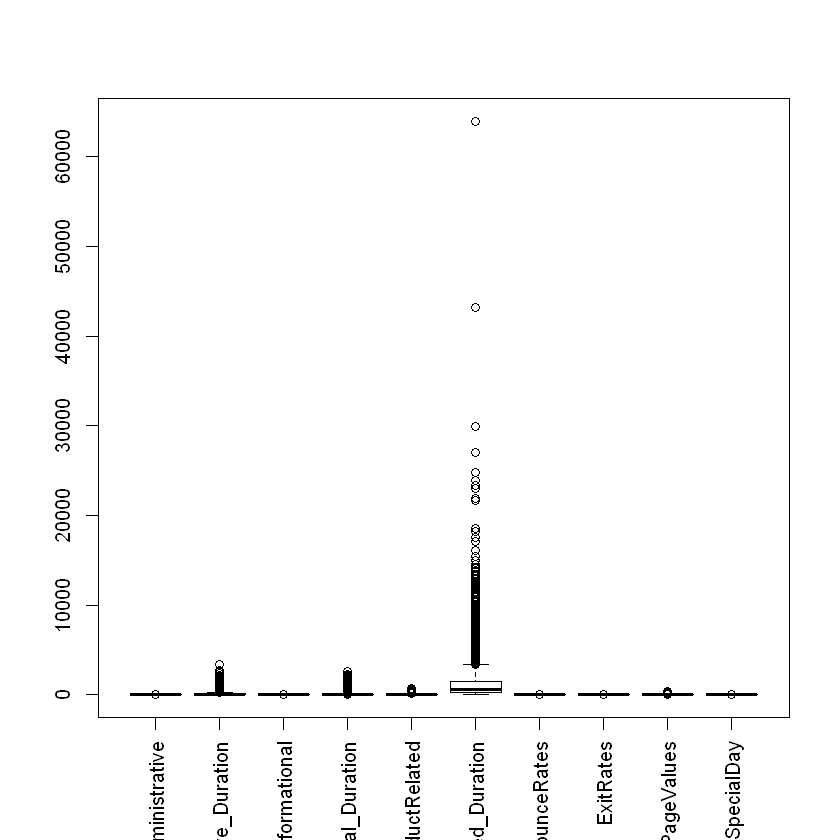

In [89]:
# Checking outliers in the numerical variables.
# subsetting data into the numerical columns.
#
w = e_com[, c(1,2,3,4,5,6,7,8,9,10)]

# plotting the boxplots
boxplot(w, las=3)

The data has ouliers. The variables with most outliers include product_related duration, administrative duration and informational duration. 

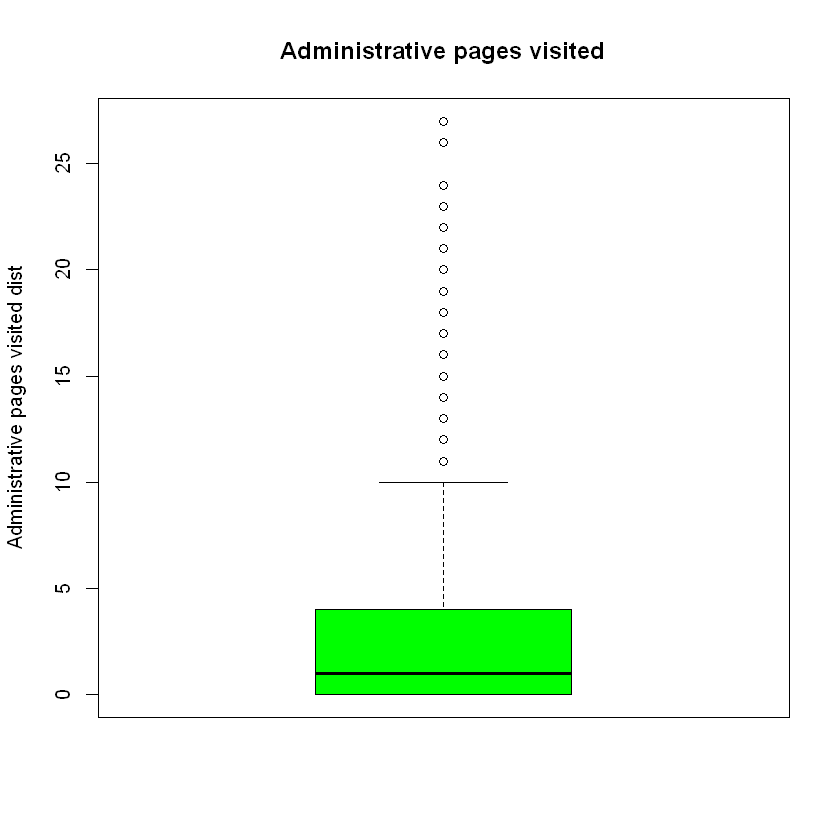

In [90]:
# individual boxplots.
# Boxpot for Administrative variable

a = boxplot(e_com$Administrative, col = "green", main = "Administrative pages visited", ylab = "Administrative pages visited dist")

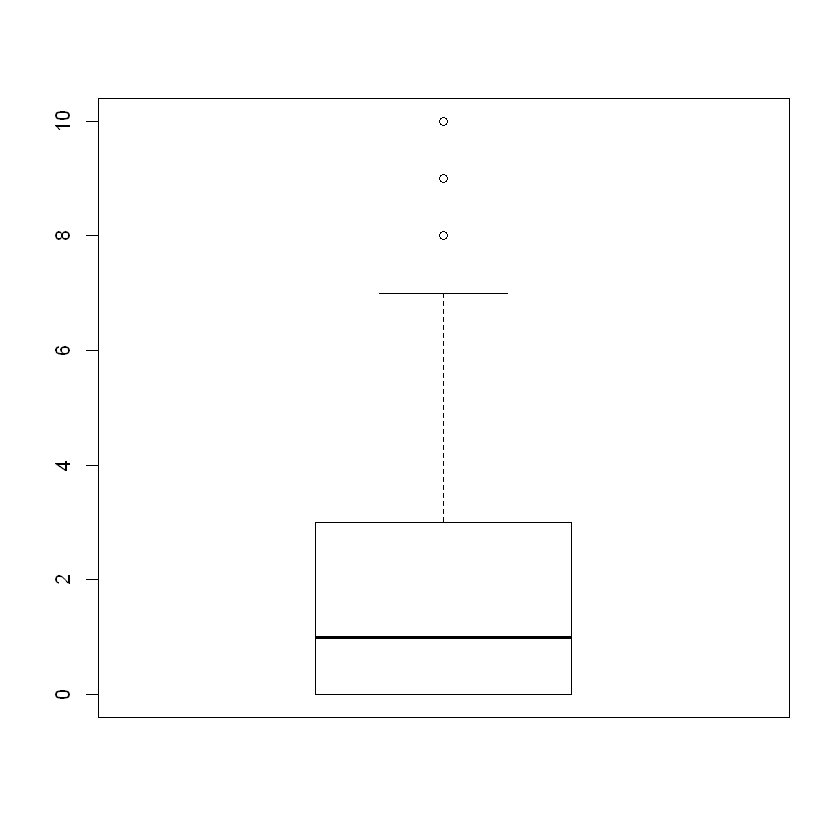

In [91]:
#Dropping the outliers in Adminstrative variable.
# we create a new dataframe e_com_new so that we do not loose original information

outliers = a$out
e_com_new = e_com
e_com_new = e_com_new[-which(e_com_new$Administrative %in% outliers),]
boxplot(e_com_new$Administrative)

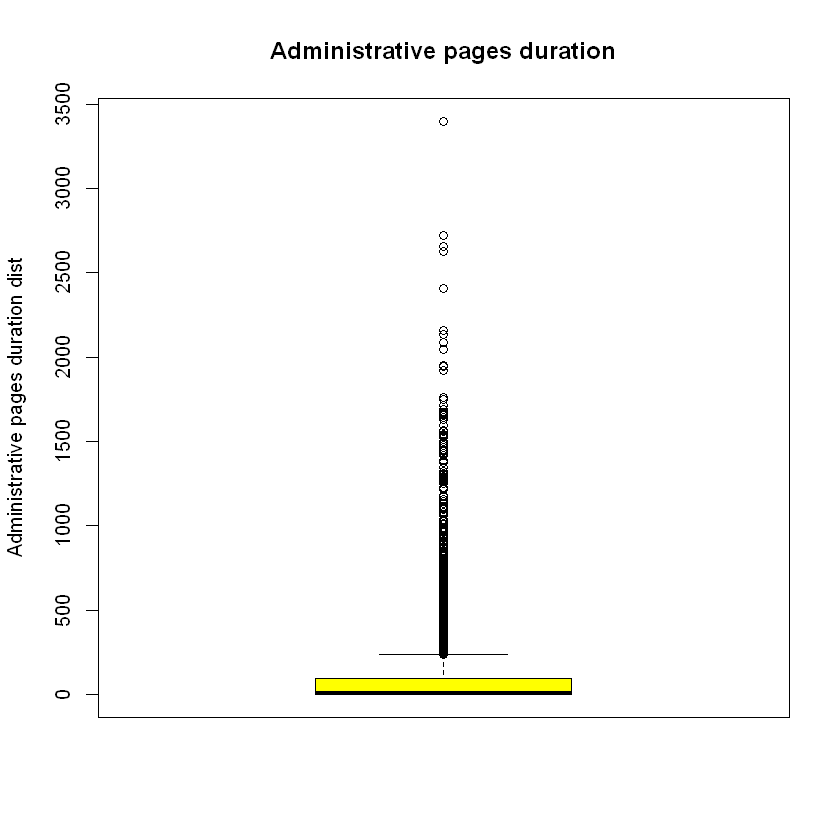

In [92]:
# Boxpot for Administrative_Duration variable
#Dropping the outliers in Administrative_Duration variable.
b = boxplot(e_com$Administrative_Duration, col = "yellow", main = "Administrative pages duration", ylab = "Administrative pages duration dist")

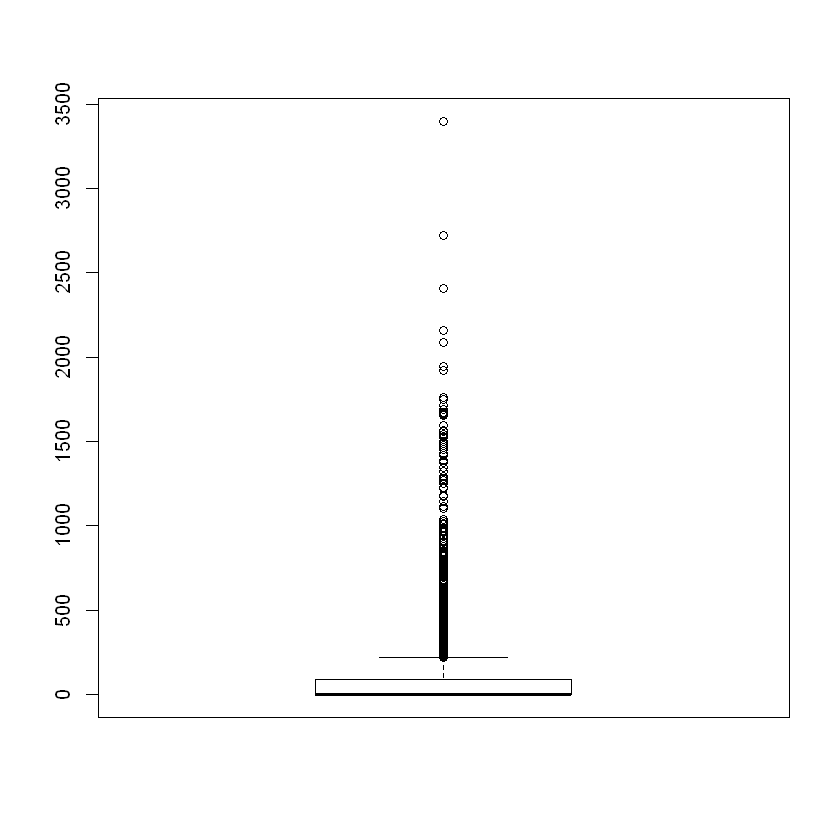

In [93]:
#Dropping the outliers in Administrative_Duration variable.outliers = b$out

e_com_new = e_com_new[-which(e_com_new$Administrative_Duration %in% outliers),]
boxplot(e_com_new$Administrative_Duration)

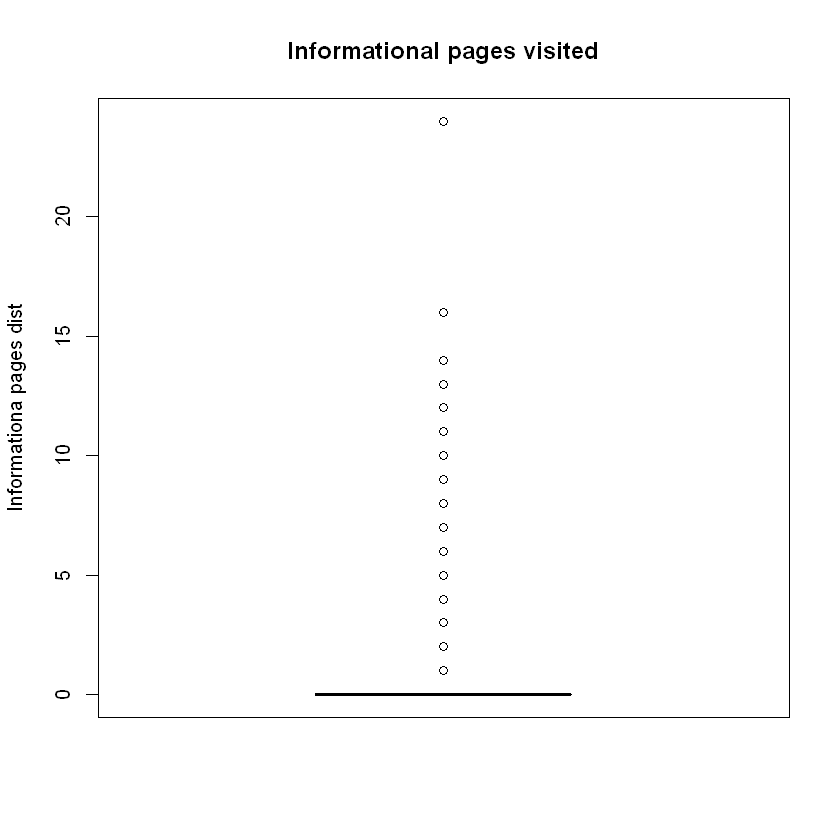

In [94]:
# Boxplot for Informational variable

c = boxplot(e_com$Informational, col = "gold", main = "Informational pages visited", ylab = "Informationa pages dist")

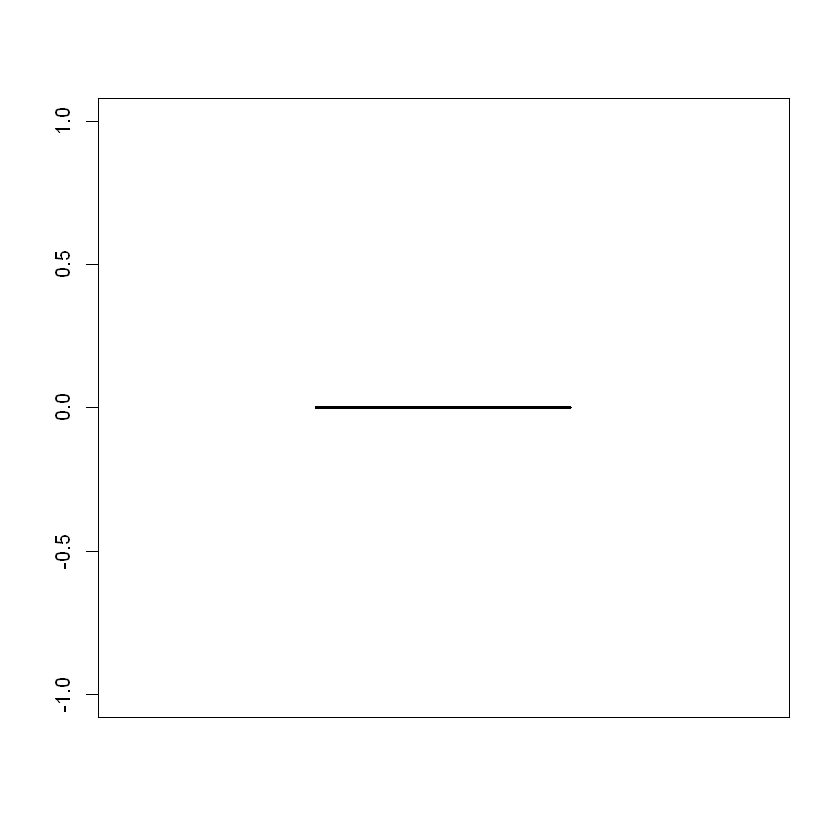

In [95]:
# Dropping outliers in the informational variable

outliers = c$out
e_com_new = e_com_new[-which(e_com_new$Informational %in% outliers),]
boxplot(e_com_new$Informational)

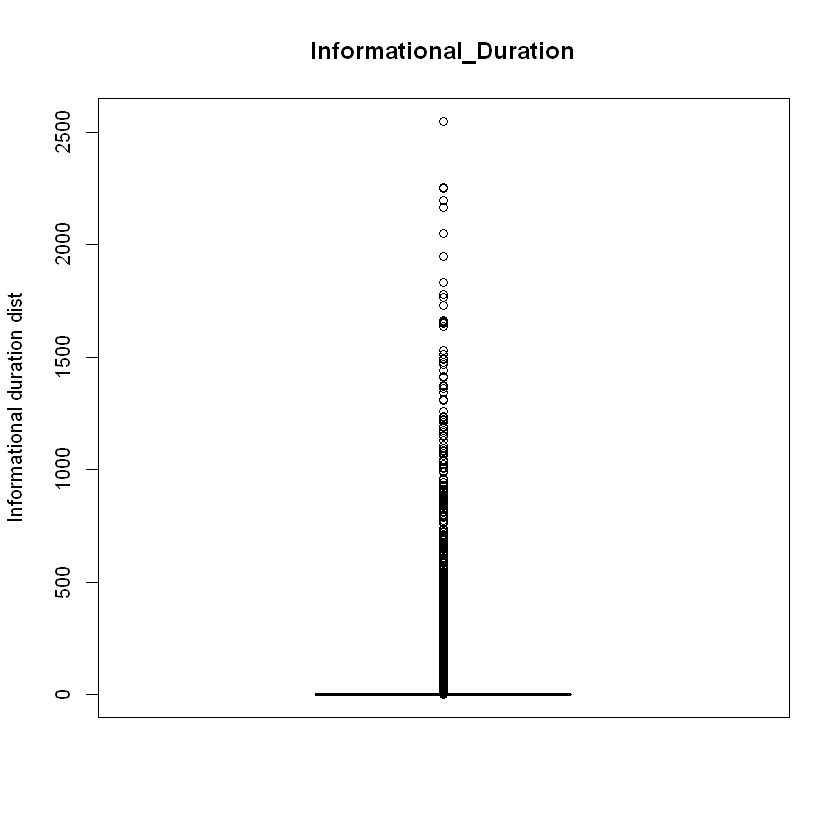

In [96]:
# Boxplot for informational duration

d = boxplot(e_com$Informational_Duration, col = "pink", main = "Informational_Duration", ylab = "Informational duration dist")

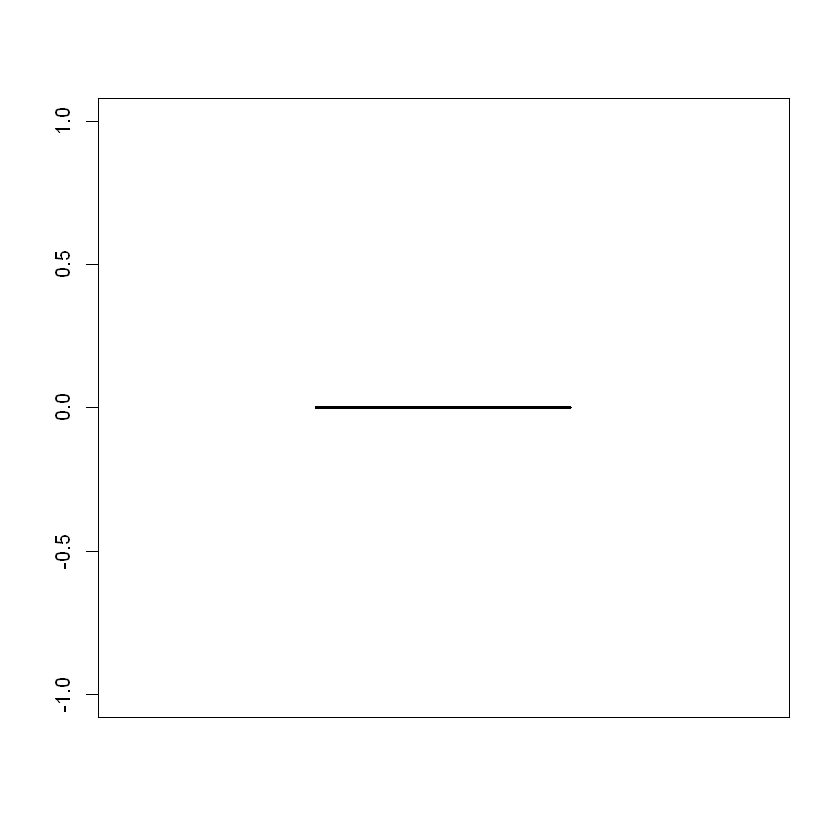

In [97]:
# Droping outliers in Informational_duration variable

outliers = d$out
e_com_new = e_com_new[-which(e_com_new$Informational_Duration %in% outliers),]
boxplot(e_com_new$Informational_Duration)

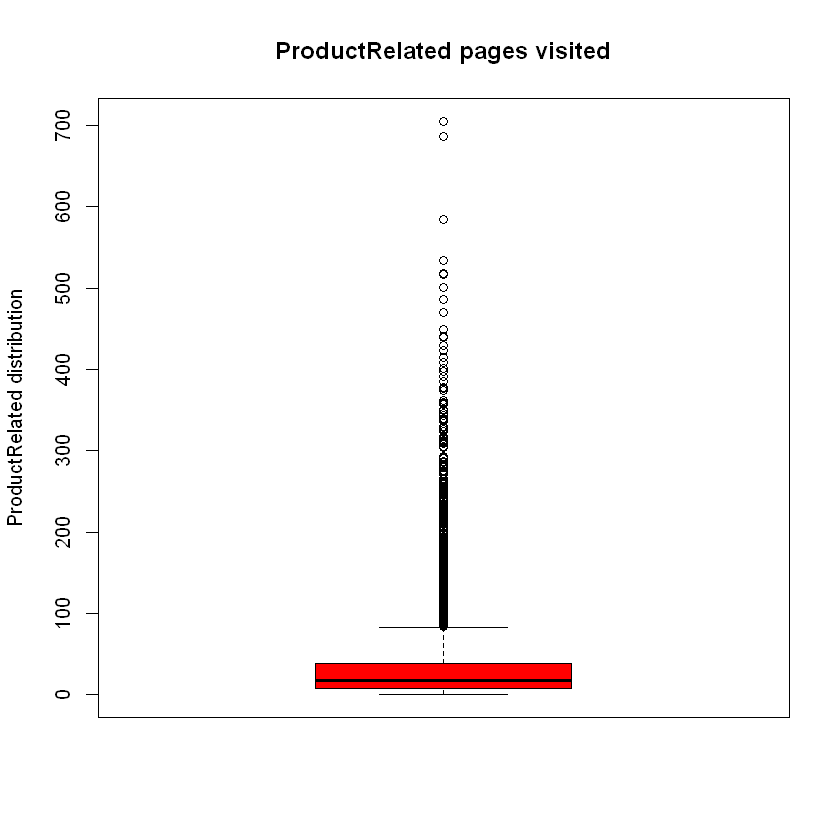

In [98]:
# Boxplot for product related variable

e = boxplot(e_com$ProductRelated, col = "red", main = "ProductRelated pages visited", ylab = "ProductRelated distribution")

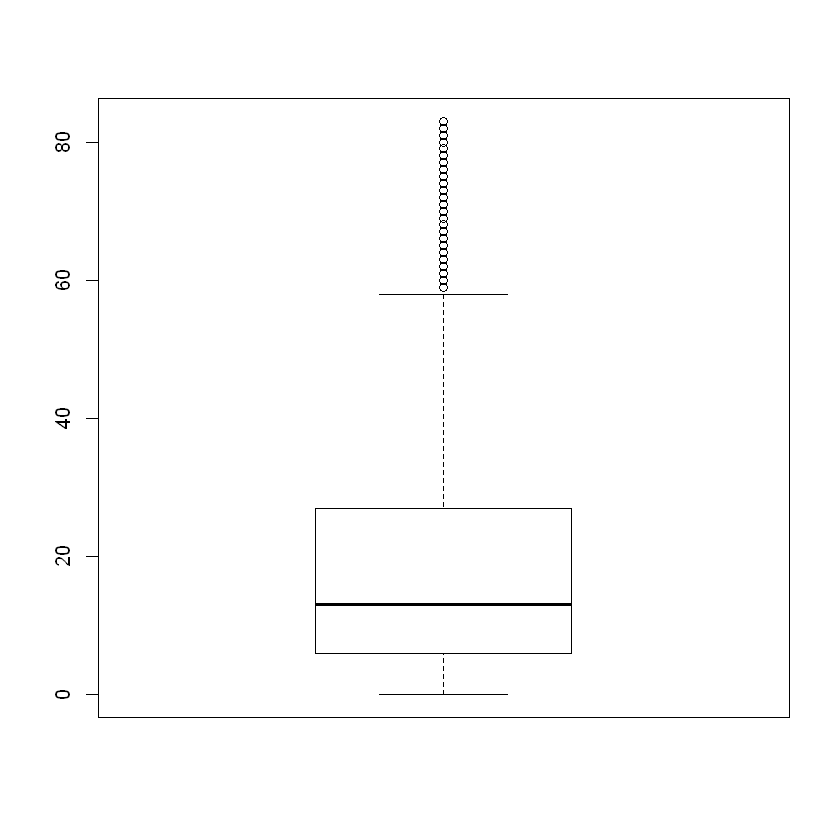

In [99]:
# dropping outliers in the product related variable

outliers = e$out
e_com_new = e_com_new[-which(e_com_new$ProductRelated %in% outliers),]
boxplot(e_com_new$ProductRelated)

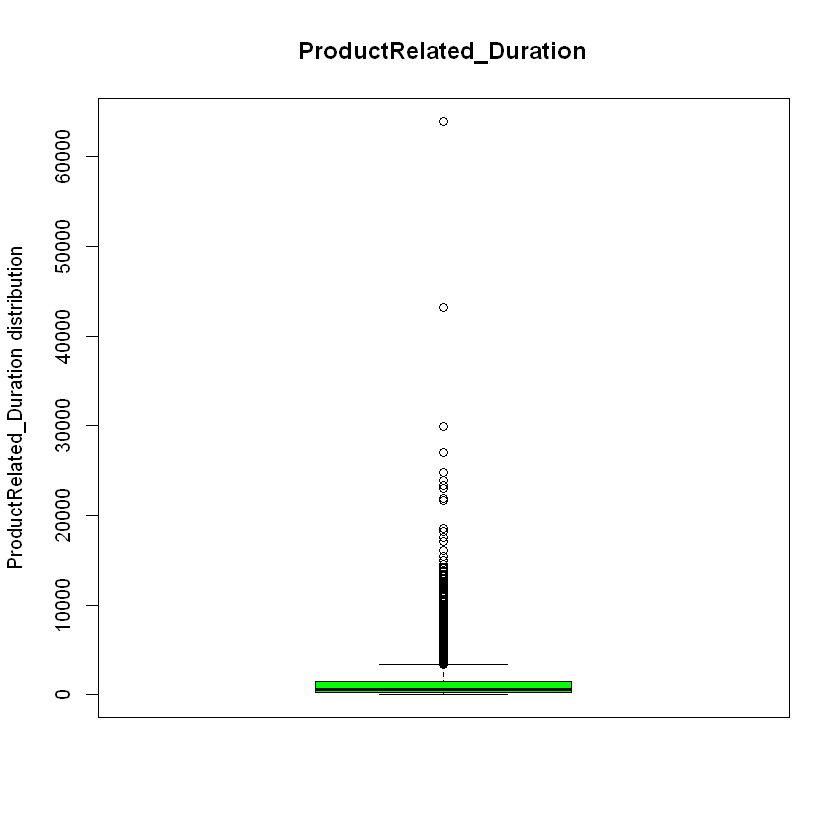

In [100]:
# Boxplot for product related_duration

f = boxplot(e_com$ProductRelated_Duration, col = "green", main = "ProductRelated_Duration", ylab = "ProductRelated_Duration distribution")

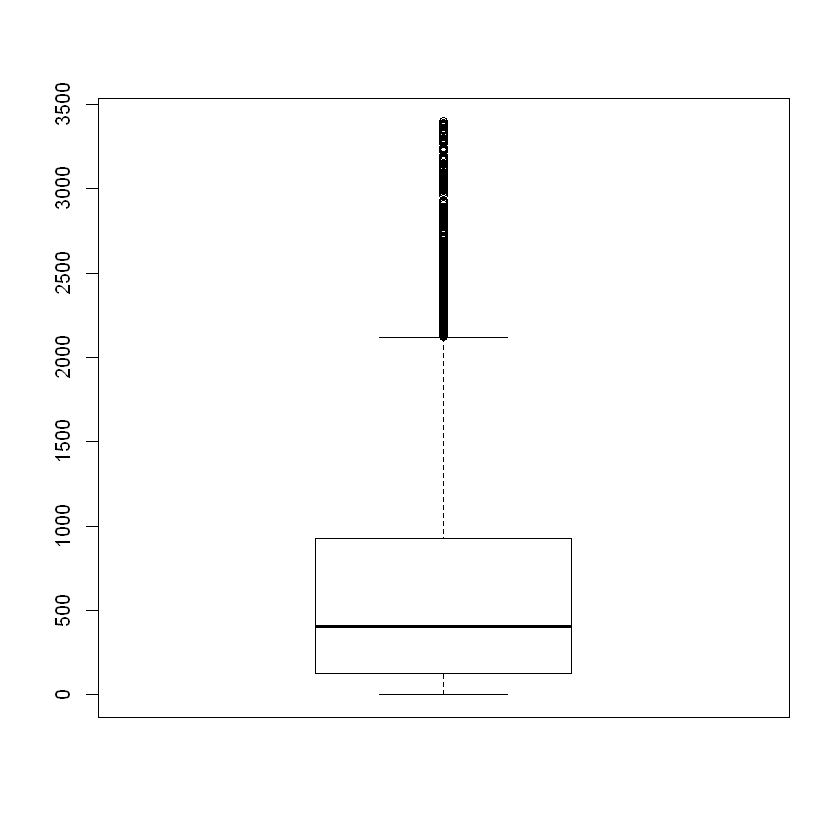

In [101]:
# Dropping outliers in the product related_duration variable

outliers = f$out
e_com_new = e_com_new[-which(e_com_new$ProductRelated_Duration %in% outliers),]
boxplot(e_com_new$ProductRelated_Duration)

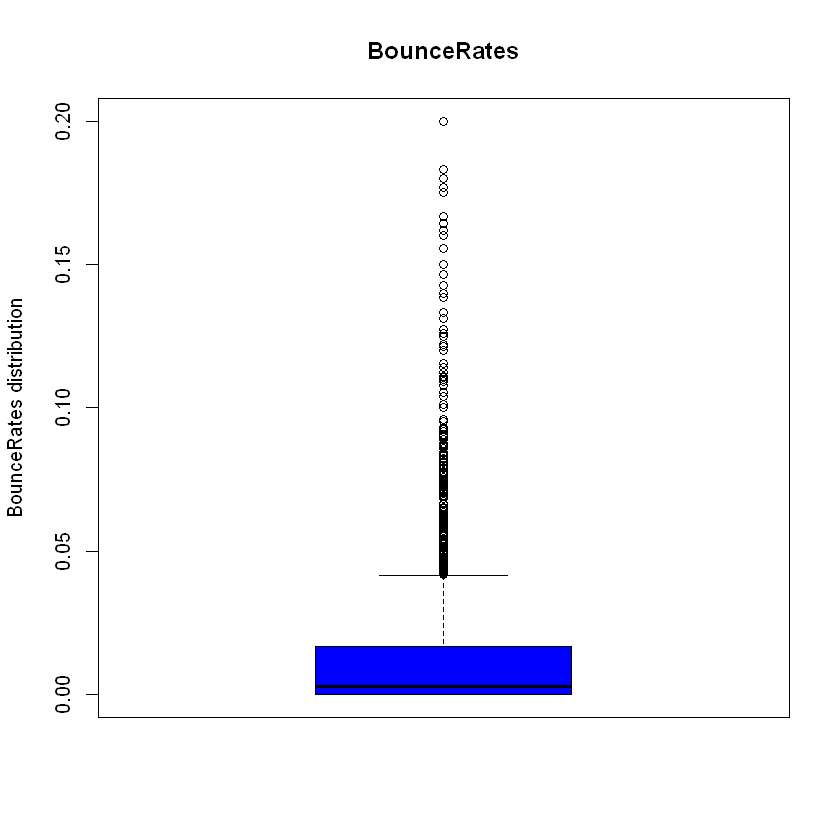

In [102]:
# Boxplot for bounce rates

g = boxplot(e_com$BounceRates, col = "blue", main = "BounceRates", ylab = "BounceRates distribution")

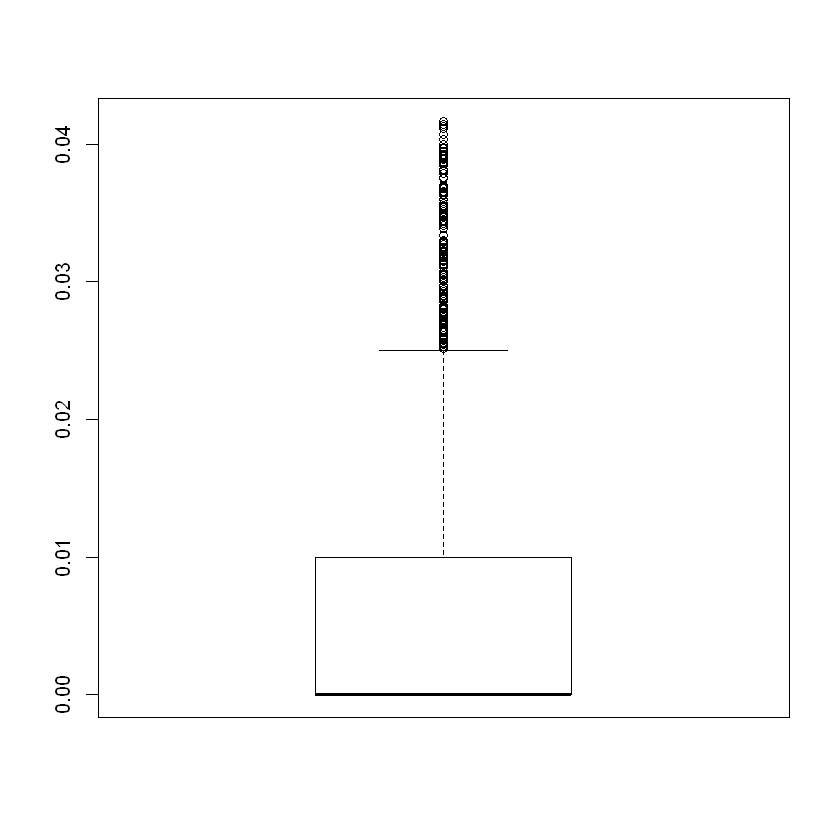

In [103]:
# Dropping outliers in the variable bounce rates

outliers = g$out
e_com_new = e_com_new[-which(e_com_new$BounceRates %in% outliers),]
boxplot(e_com_new$BounceRates)

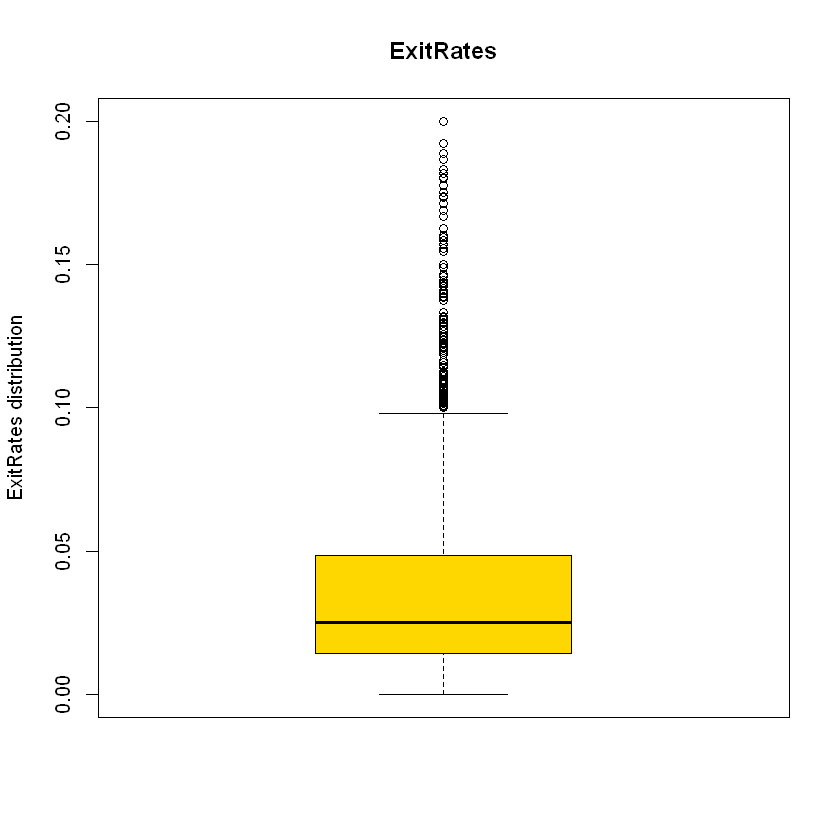

In [104]:
# Boxplot for exit rates

h = boxplot(e_com$ExitRates, col = "gold", main = "ExitRates", ylab = "ExitRates distribution")

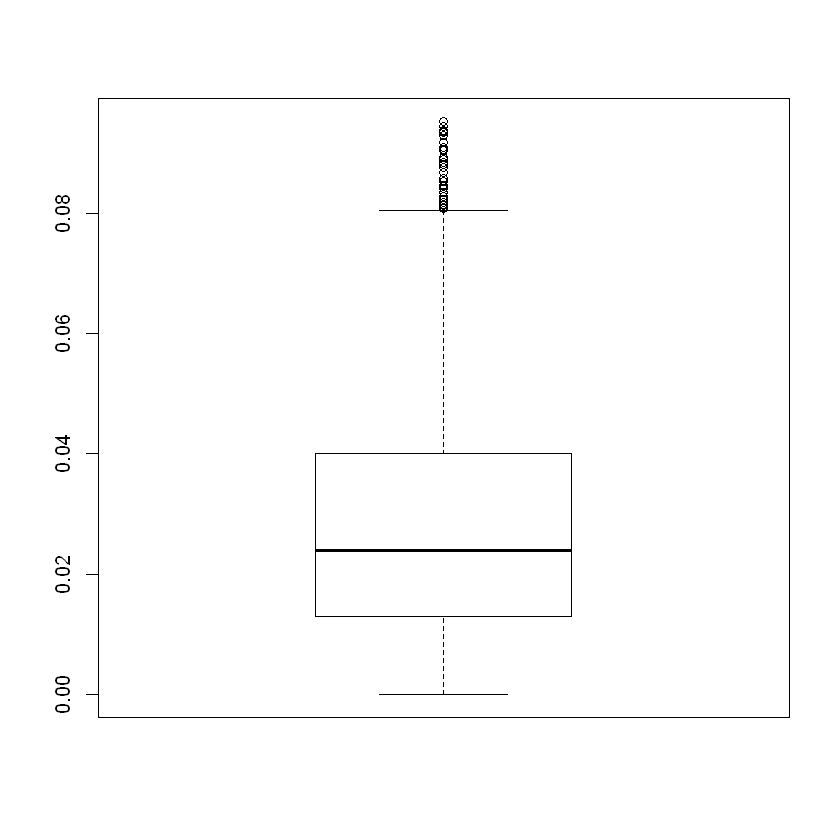

In [105]:
# Dropping outliers in the variable in the exit rates variable

outliers = h$out
e_com_new = e_com_new[-which(e_com_new$ExitRates %in% outliers),]
boxplot(e_com_new$ExitRates)

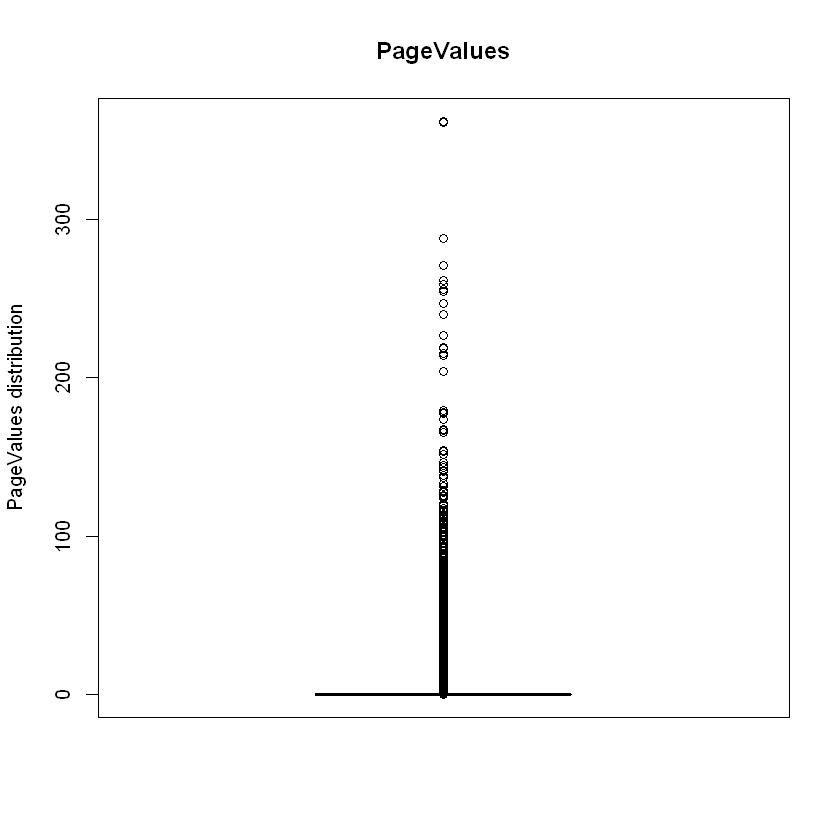

In [106]:
# Boxplot for page value

i = boxplot(e_com$PageValues, col = "red", main = "PageValues", ylab = "PageValues distribution")

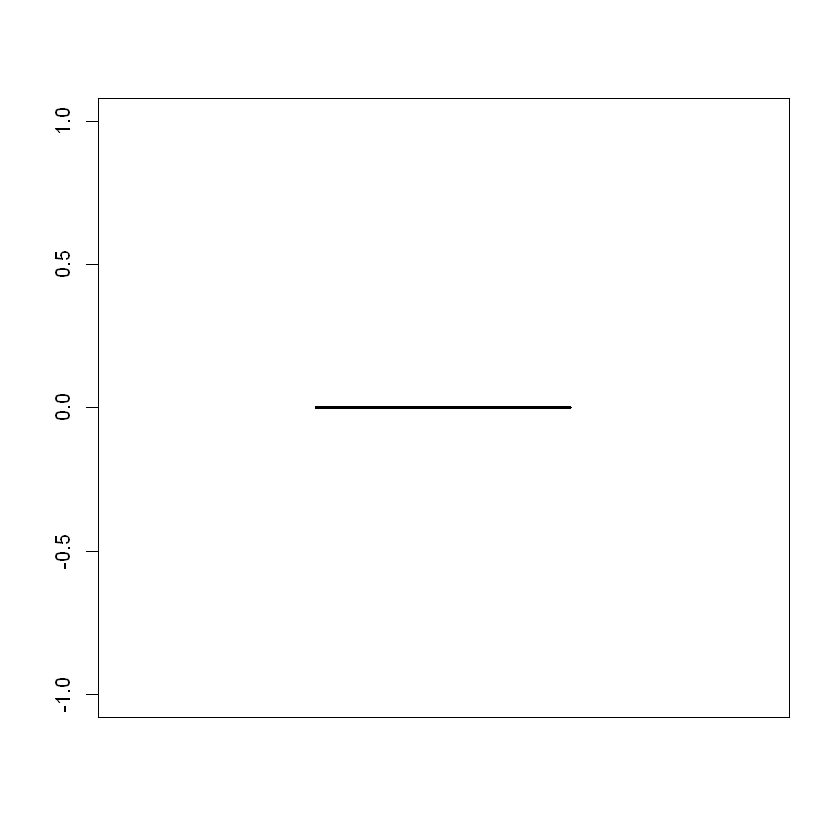

In [107]:
# Dropping outliers in the pagevalues variable

outliers = i$out
e_com_new = e_com_new[-which(e_com_new$PageValues %in% outliers),]
boxplot(e_com_new$PageValues)

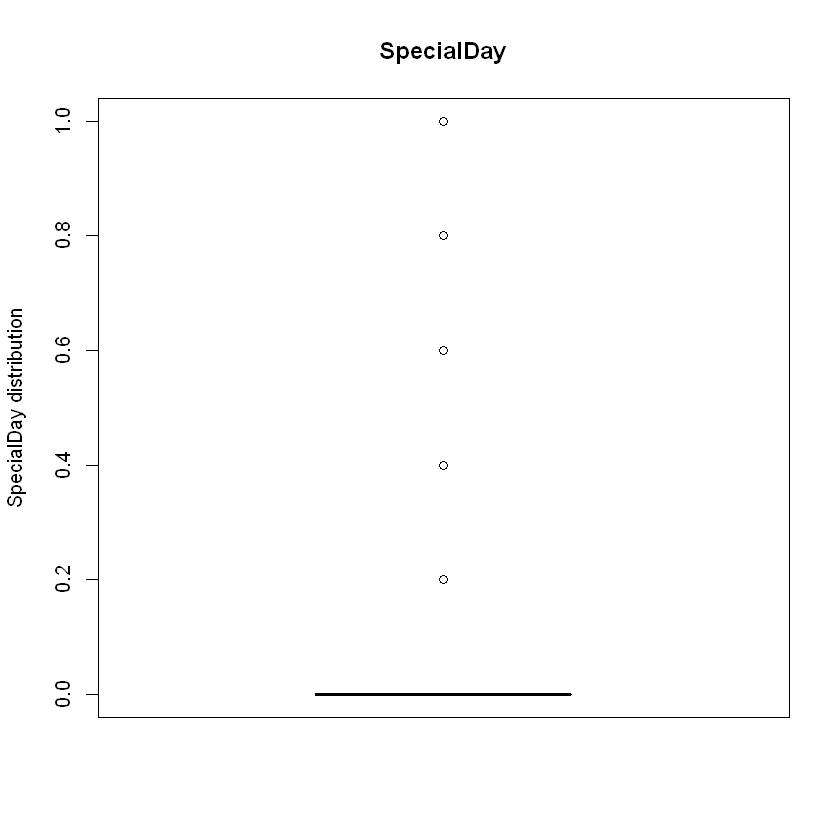

In [108]:
# Boxplot for special day variable

j = boxplot(e_com$SpecialDay, col = "red", main = "SpecialDay", ylab = "SpecialDay distribution")

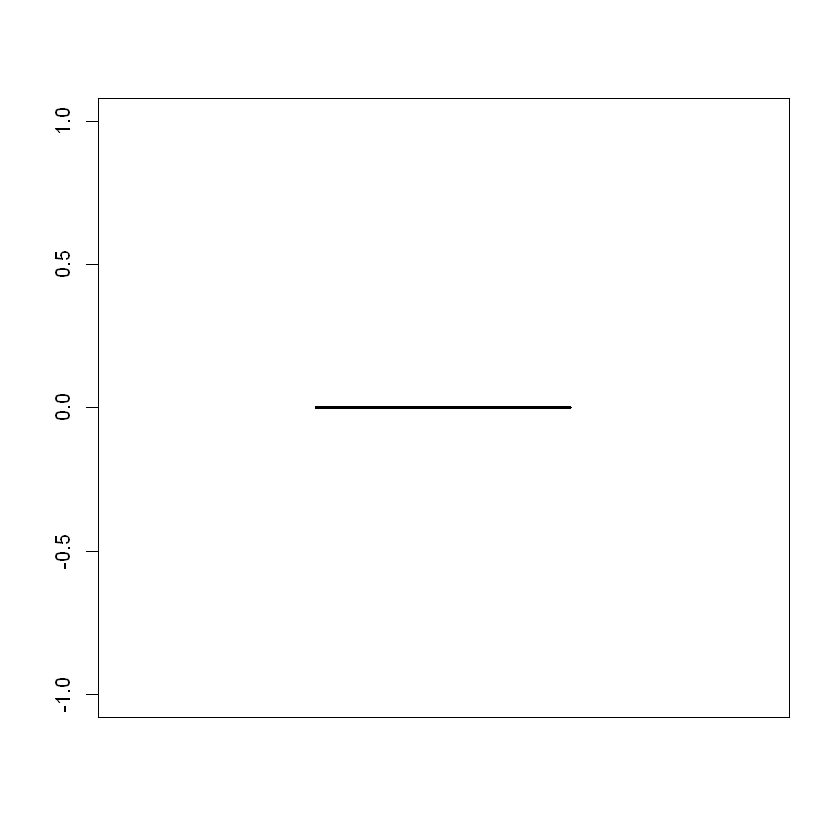

In [109]:
# Dropping outliers in the special day column.

outliers = j$out
e_com_new = e_com_new[-which(e_com_new$SpecialDay %in% outliers),]
boxplot(e_com_new$SpecialDay)

In [110]:
# Checking dimension of the remaining data after dropping the outliers
dim(e_com_new)

[1] 5087   18

We have lost so much data after dropping outliers, which makes it an unwise decisions to drop them. 
I will proceed with EDA with the original data set, one that has the outliers

# EXPLORATORY DATA ANALYSIS

## Univariate analysis

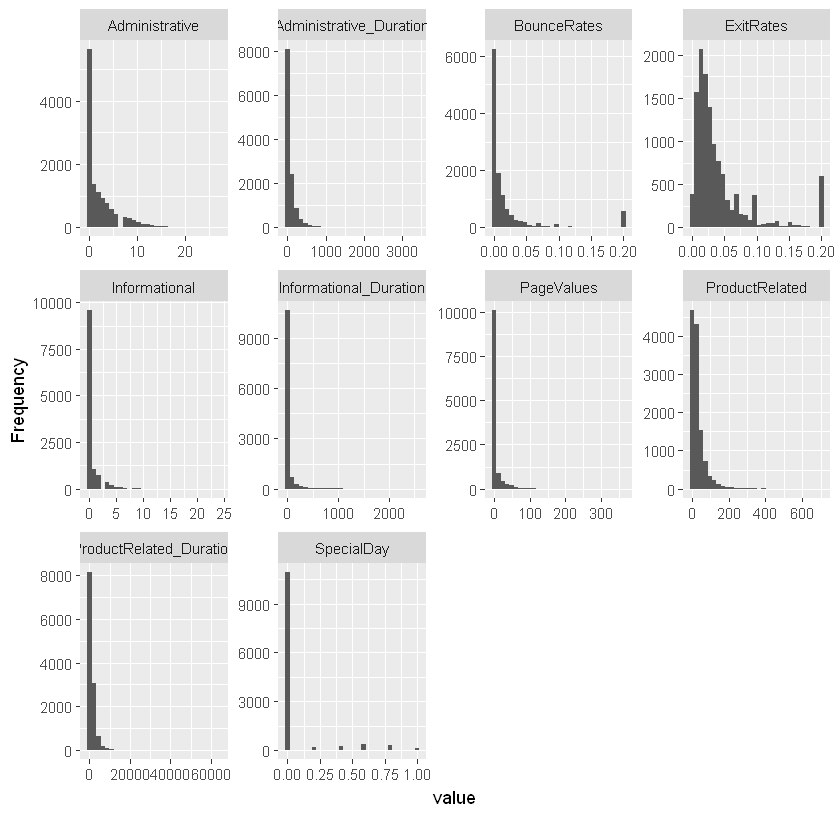

In [111]:
# Installing the data explorer package for univariate analysis

#install.packages('DataExplorer')
library(DataExplorer)

# plotting numerical variables

plot_histogram(e_com)


The above histograms show the distribution of all the numerical variables. 
All the numerical variables are skewed to the right.
This shows that the numerical varibles mostly have low values.
From the distribution above, we can conclude that not many people visit the pages on this e_comerce site.
The product related page is visited most compared to all the other pages.


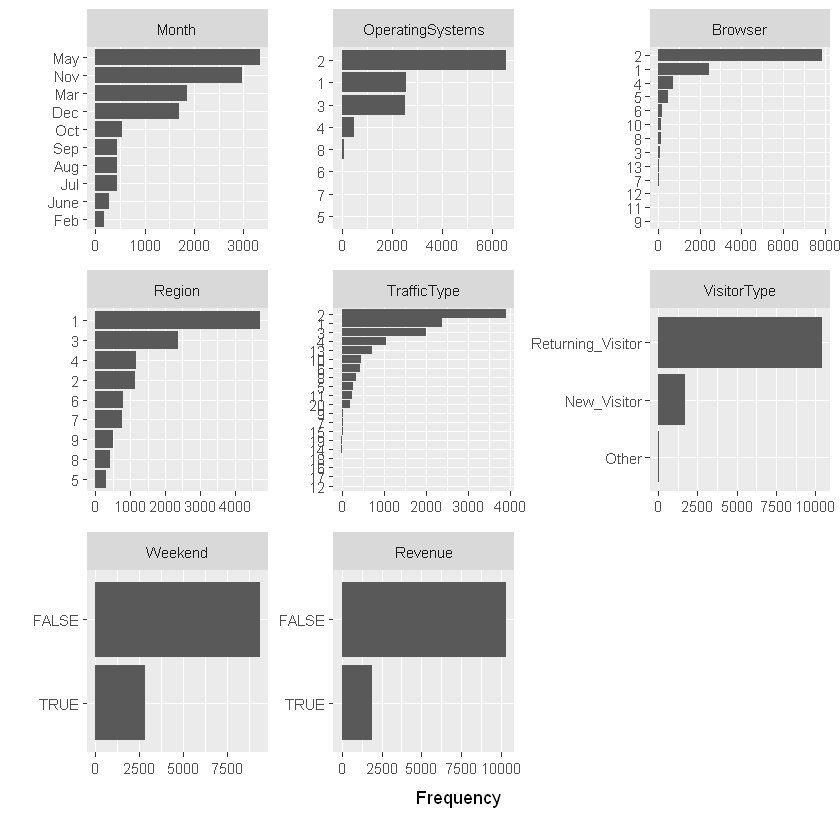

In [112]:
# Plotting the categorical variables.

plot_bar(e_com)

The above bar graphs show the distribution of the categorical variables.

- month - most data was collected in the month of may and least data in february
- Operating System - The unidentified operating system 2 is used most. OS 8 is least used
- Browser - The unidentified Browser 2 is used most. Browser 7 is least used
- Region - Most of the e_com site visitors are from region 1, and least visitors in region 5
- Traffic type 2 - traffic type 2 is mostly experienced.
- Visitor type - most of the site visitors are return visitors
- weekend - most people are on the site on weekdays, compare to weekends.
- Revenue - revenue is mostly false. This variable identifies whether a site visitor made a purchase
- Most people visiting the site are not naking purchases.

## Bivariate analysis

In [113]:
#data preview
head(e_com)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


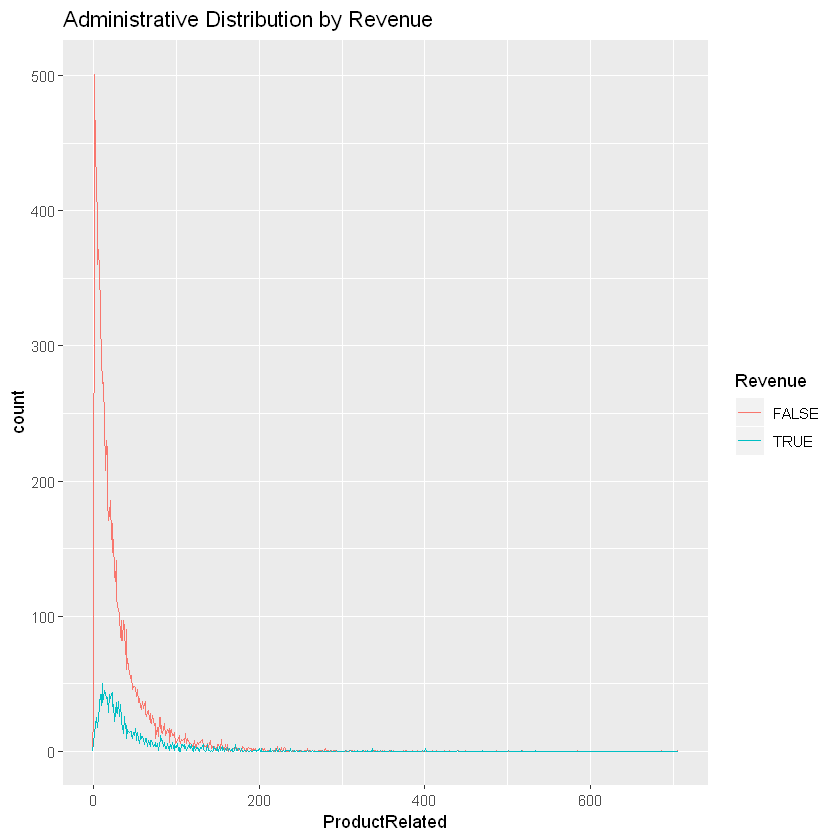

In [114]:
# Importing library
library(ggplot2)

ggplot(e_com, aes(ProductRelated, colour = Revenue)) +
geom_freqpoly(binwidth = 1) + labs(title="Administrative Distribution by Revenue")
 

Most people did not visit the products related page

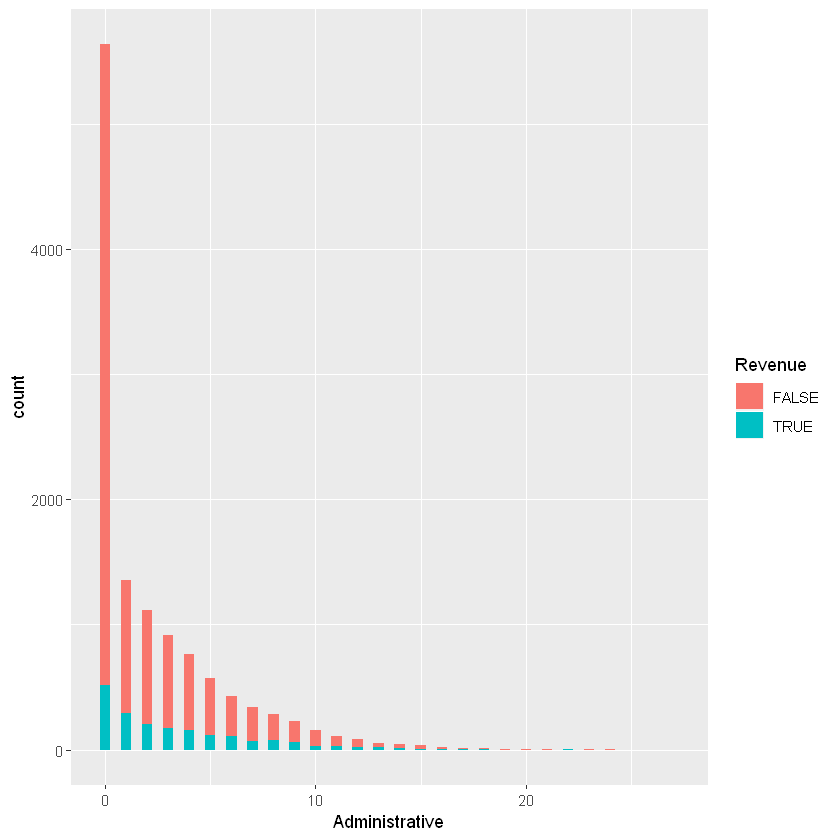

In [115]:
j = ggplot(e_com, aes(x = Administrative , fill = Revenue))+ 
geom_bar(width = 0.5)
j

very many people did not visit the adminstrative pages. Out of those that visited the pages, very few brought in revenue

In [120]:
p = e_com[, c(1,2,3,4,5,6,7,8,9,10)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.00000000,0.60040965,0.37528761,0.25478602,0.42819151,0.37102722,-0.21366664,-0.3112741,0.09692097,-0.09707210
Administrative_Duration,0.60040965,1.00000000,0.30143630,0.23718986,0.28678391,0.35351379,-0.13733340,-0.2020245,0.06616837,-0.07473689
Informational,0.37528761,0.30143630,1.00000000,0.61867795,0.37260472,0.38608372,-0.10950530,-0.1595668,0.04739015,-0.04937677
Informational_Duration,0.25478602,0.23718986,0.61867795,1.00000000,0.27906195,0.34658069,-0.07015947,-0.1029327,0.03006416,-0.03129304
ProductRelated,0.42819151,0.28678391,0.37260472,0.27906195,1.00000000,0.86030819,-0.19351577,-0.2861632,0.05411549,-0.02593062
ProductRelated_Duration,0.37102722,0.35351379,0.38608372,0.34658069,0.86030819,1.00000000,-0.17437550,-0.2453340,0.05084062,-0.03821065
BounceRates,-0.21366664,-0.13733340,-0.10950530,-0.07015947,-0.19351577,-0.17437550,1.00000000,0.9033582,-0.11599198,0.08783999
ExitRates,-0.31127413,-0.20202445,-0.15956681,-0.10293268,-0.28616321,-0.24533401,0.90335819,1.0000000,-0.17357154,0.11678376
PageValues,0.09692097,0.06616837,0.04739015,0.03006416,0.05411549,0.05084062,-0.11599198,-0.1735715,1.00000000,-0.06453271
SpecialDay,-0.09707210,-0.07473689,-0.04937677,-0.03129304,-0.02593062,-0.03821065,0.08783999,0.1167838,-0.06453271,1.00000000


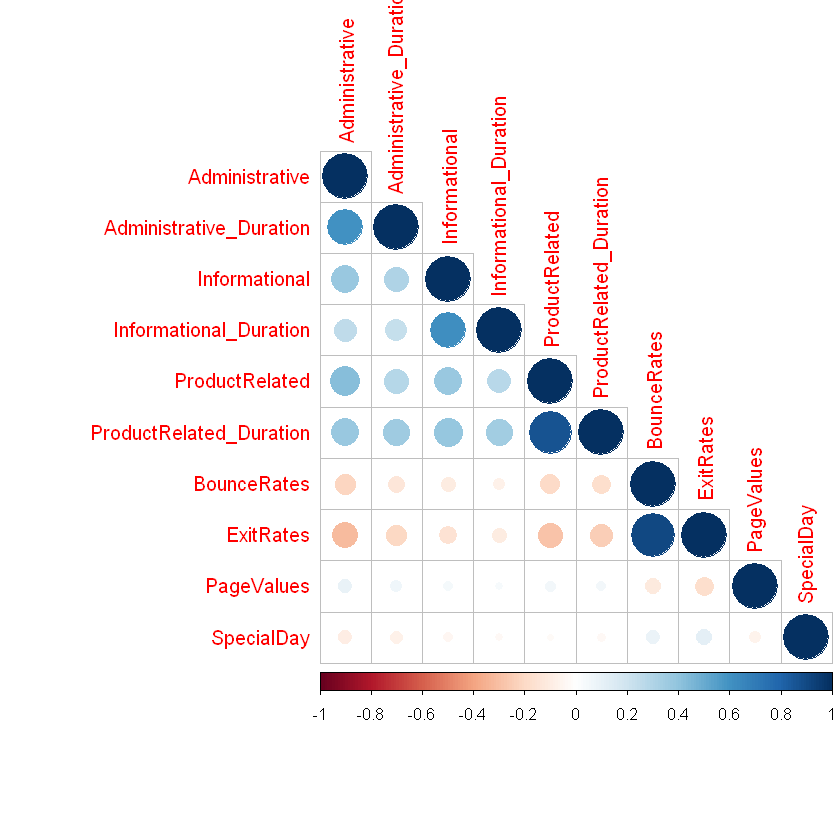

In [132]:
#install.packages('corrplot')
#e_com.num <- p[, sapply(p, is.numeric)]
data.cor = cor(p)
data.cor
library(corrplot)
corrplot(data.cor, type = 'lower')

Not many people visited the adminstrative pages. Out of those who visited the pages, very few of them brought in revenue. 

Variables seen to have a high correlation include:
1) ExitRates and Page values
2) Product related_duration and bounce rates.
Most of the other variables have a correlation of between -0.2 and 0.4

# UNSUPERVISED LEARNING

 ## K - Means Algorithm

In [133]:
# Sepaeating features and ladels
# features
e_com_feat = e_com[, c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)]

# labels
e_com_lab = e_com[, 18]

In [134]:
# Normalizing the dataset so that no particular numerical attribute 
# has more impact on clustering algorithm than others.
# ---
# 
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

In [135]:
# storing the numerical attributes in a new variable, then applying normalisation function.

p = c('Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay')
for (i in p){
    e_com_feat[, i] = normalize(e_com_feat[, i]) 
}


In [136]:
# label encoding needs to be done on some categorical variables.
# storing the numerical attributes in a new variable, then converting them to numerics.

g = c('Month','VisitorType', 'Weekend')
for (i in g){
    e_com_feat[,i] = as.numeric(e_com_feat[,i])
}


In [137]:
# Preview of the features
head (e_com_feat)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,3,1,1,1,1,3,0
0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,3,2,2,1,2,3,0
0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,3,4,1,9,3,3,0
0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,3,3,2,2,4,3,0
0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,3,3,3,1,4,3,1
0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,3,2,2,1,3,3,0


In [138]:
# Applying the K-means clustering algorithm with no. of centroids(k)=2
# ---
# 
k_model <- kmeans(e_com_feat,2) 


In [139]:
# Previewing the no. of records in each cluster
# 
k_model$cluster_obs = as.numeric(e_com_lab)

k_model$size 
table(k_model$cluster,k_model$cluster_obs )

[1] 10116  2083

   
       0    1
  1 8541 1575
  2 1750  333

In [140]:
#checking clustering accuracy

mean(k_model$cluster_obs == k_model$cluster)


[1] 0.1291089

k-means performed very poorly

## Hierachichal clustering Algorithm

In [141]:
# Calculating euclidean distances of the independent variables.

d <- dist(e_com_feat, method = "euclidean")

In [142]:
# using the hclust clustering method.
h_model <- hclust(d, method = "ward.D2" )


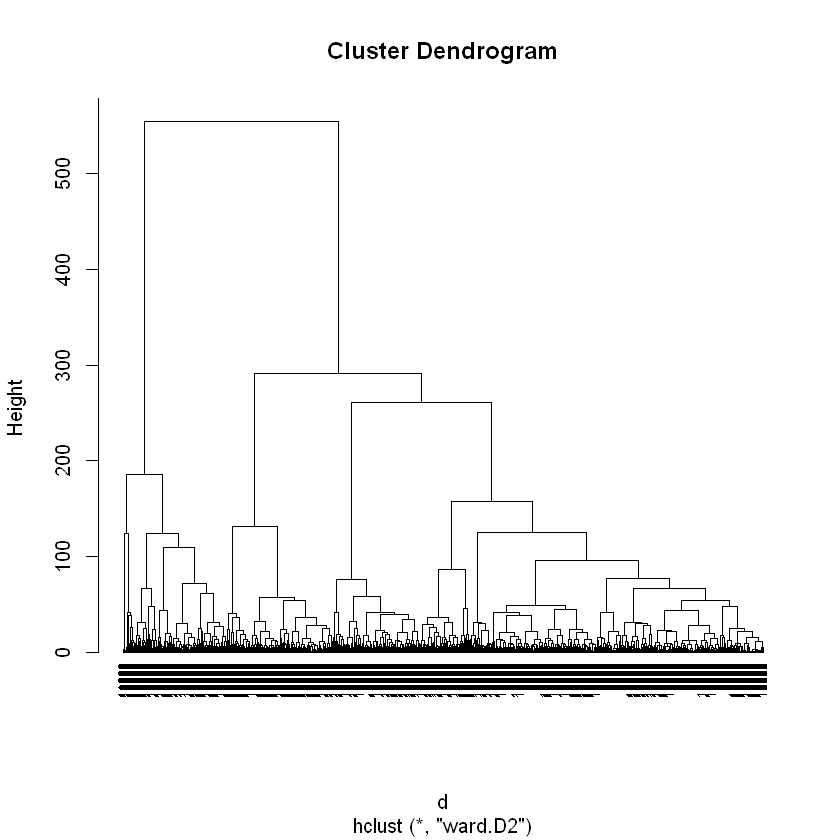

In [143]:
# plotting the dendogram
plot(h_model, cex = 0.6, hang = -1)

In [144]:
# Cut tree into 2 groups.
sub_group = cutree (h_model, k = 2)
table (sub_group)

sub_group
    1     2 
10224  1975 

In [145]:
table (sub_group, k_model$cluster_obs)

         
sub_group    0    1
        1 8602 1622
        2 1689  286

In [146]:
#checking accuracy
mean(sub_group == k_model$cluster_obs)

[1] 0.1329617

Accuracy has improved but still very low

## DB - Scan Algorithm

In [147]:
#install.packages('dbscan')

Installing package into 'C:/Users/Admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'dbscan' is in use and will not be installed"

In [149]:
# Loading the required library

library("dbscan")

In [150]:
# Applying our DBSCAN algorithm
# using a minimum of 4 points with in a distance of eps(0.4)
# 
l = c('OperatingSystems','Browser','Region','TrafficType')
for (i in l){
    e_com_feat[,i] = as.numeric(e_com_feat[,i])
}

db_model <- dbscan(e_com_feat,eps=0.4,MinPts = 4)


Warning message in dbscan(e_com_feat, eps = 0.4, MinPts = 4):
"converting argument MinPts (fpc) to minPts (dbscan)!"

In [151]:
print(db_model)

DBSCAN clustering for 12199 objects.
Parameters: eps = 0.4, minPts = 4
The clustering contains 633 cluster(s) and 5901 noise points.

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
5901    5   10    7    4   12   30   19   88   15   45   19   59    5    9   10 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
   4    6    6   25    6    8   25    8    5    7   10    8   10    5    7   14 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
   9   14   11    4   12   17   10    4    9   14   27   19   26    6    5    7 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
   4   16    8   13    9    9   12    9    9    5    6    5    5    5    7    5 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
   4    7    6    5    7    4   11    4    7    7    4   12    4    5    4    5 
  80   81   82   83   84   85   86   87   88   89   90  

Warning message in hullplot(e_com_feat, db_model$cluster):
"Not enough colors. Some colors will be reused."

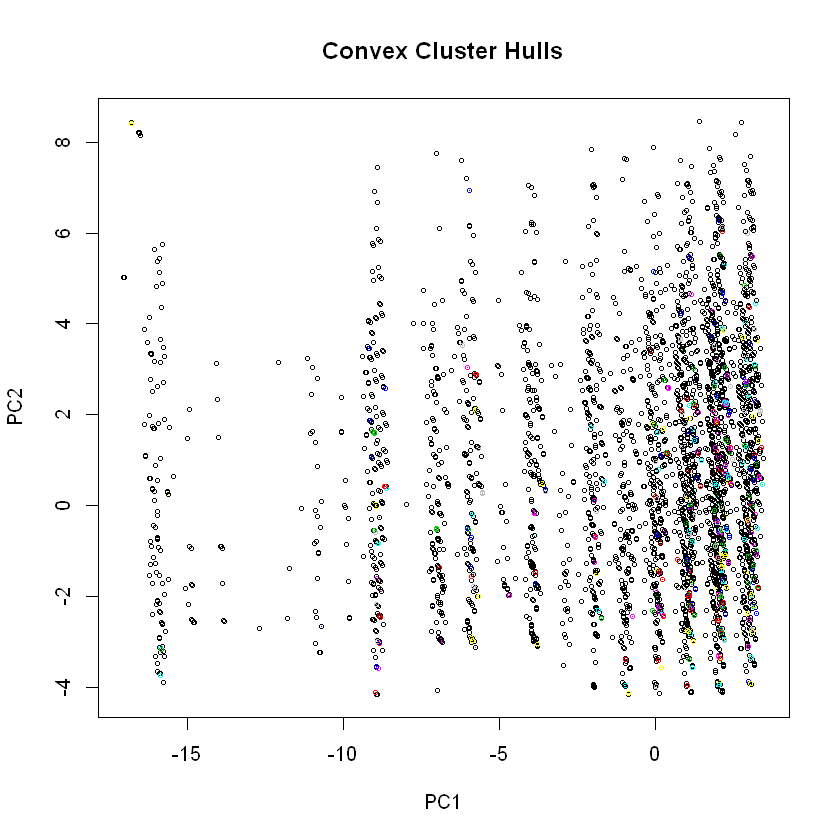

In [152]:
hullplot(e_com_feat,db_model$cluster)